<a href="https://colab.research.google.com/github/tanvansh/face-eye_recognition/blob/main/Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

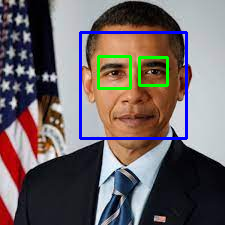

In [7]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('obama.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#First detect face and then look for eyes inside the face.
#Multiscale refers to detecting objects (faces) at multiple scales. 
faces = face_cascade.detectMultiScale(gray, 1.3, 5) #scaleFactor = 1.3, minNeighbors = 3
#Above faces returns a list of rectangles. For Obama image we only have 1 face
#so it return a tuplr of (1,4) --> 1 represents one rectangle and 4 represents
#the x,y,w,h values that define the square.

#Obamas image with both barack and Michelle it returns a tuple of (2,4) --> 2 faces.

#For each detected face now detect eyes. 
#For emotion detection this is where we update code to identify facial emotion
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)   #Draw red bounding box around the face
    roi_gray = gray[y:y+h, x:x+w] #Original gray image but only the detected face part
    roi_color = img[y:y+h, x:x+w] #Original color image but only the detected face part. For display purposes
    eyes = eye_cascade.detectMultiScale(roi_gray) #Use the gray face image to detect eyes
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #Draw green bounding boxes around the eyes

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
